In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline




import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.graph_objs as go
from plotly.offline import plot


#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



In [16]:
tesla=pd.read_csv('C:/Users/TARUN SAMANTA/Desktop/Stock Price Prediction/Tesla.csv')
tesla.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
Date         1692 non-null object
Open         1692 non-null float64
High         1692 non-null float64
Low          1692 non-null float64
Close        1692 non-null float64
Volume       1692 non-null int64
Adj Close    1692 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [10]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [11]:
print(f'Dataframe contains stock prices between {tesla.Date.min()} {tesla.Date.max()}')
print(f'Total days={(tesla.Date.max()-tesla.Date.min()).days} days')

Dataframe contains stock prices between 2010-06-29 00:00:00 2017-03-17 00:00:00
Total days=2453 days


In [12]:
tesla.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.214999,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


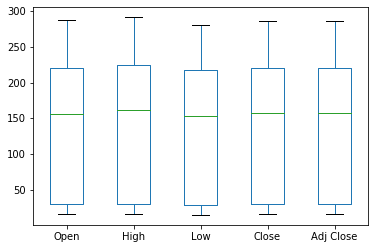

In [14]:
tesla[['Open','High','Low','Close','Adj Close']].plot(kind='box')

In [24]:
#setting the layout for our plot
layout=go.Layout(
  title='Stock Prices of Tesla',
  xaxis=dict(
        title='Date',
        titlefont=dict(
             family='Courier New, monospace',
             size=18,
             color='#7f7f7f'
        )
  ),
  yaxis=dict(
        title='Price',
        titlefont=dict(
             family='Courier New, monospace',
             size=18,
             color='#7f7f7f'
        )
  )
    
)
tesla_data=[{'x':tesla['Date'], 'y':tesla['Close']}]
plot = go.Figure(data=tesla_data, layout=layout)

In [25]:
iplot(plot)

In [35]:
#main  Part of linear Regression starts from Here
from sklearn.model_selection import train_test_split

#for processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#For model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [36]:
#split the Data into train and test sets
X=np.array(tesla.index).reshape(-1,1)
Y=tesla['Close']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=101)

In [37]:
#Feature Scaling
scaler=StandardScaler().fit(X_train)

In [38]:
from sklearn.linear_model import LinearRegression

In [41]:
#Creating a Linear Model
lm=LinearRegression()
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
#Plot actual and predicted values for train dataset

trace0=go.Scatter(

   x=X_train.T[0],
   y=Y_train,
   mode='markers',
   name='Actual'
)
trace1=go.Scatter(

   x=X_train.T[0],
   y=lm.predict(X_train).T,
   mode='lines',
   name='Predicted'
)
tesla_data=[trace0,trace1]
layout.xaxis.title.text='Day'
plot2=go.Figure(data=tesla_data,layout=layout)

In [44]:
iplot(plot2)

In [47]:
#Calculate scores for Model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train,lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test,lm.predict(X_test))}
'''
print(scores)


Metric           Train                Test        
r2_score  0.7929900409846331	0.7956409009085726
MSE       1836.922396703335	1823.878476313188

